In [14]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv")

In [18]:
df.head()
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [22]:
df.shape

(8807, 12)

In [24]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [26]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [28]:
missing_percent = df.isnull().mean() * 100
print(missing_percent)

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


In [30]:
import missingno as msno
msno.matrix(df)

ModuleNotFoundError: No module named 'missingno'

In [32]:
!pip install missingno

<Axes: >

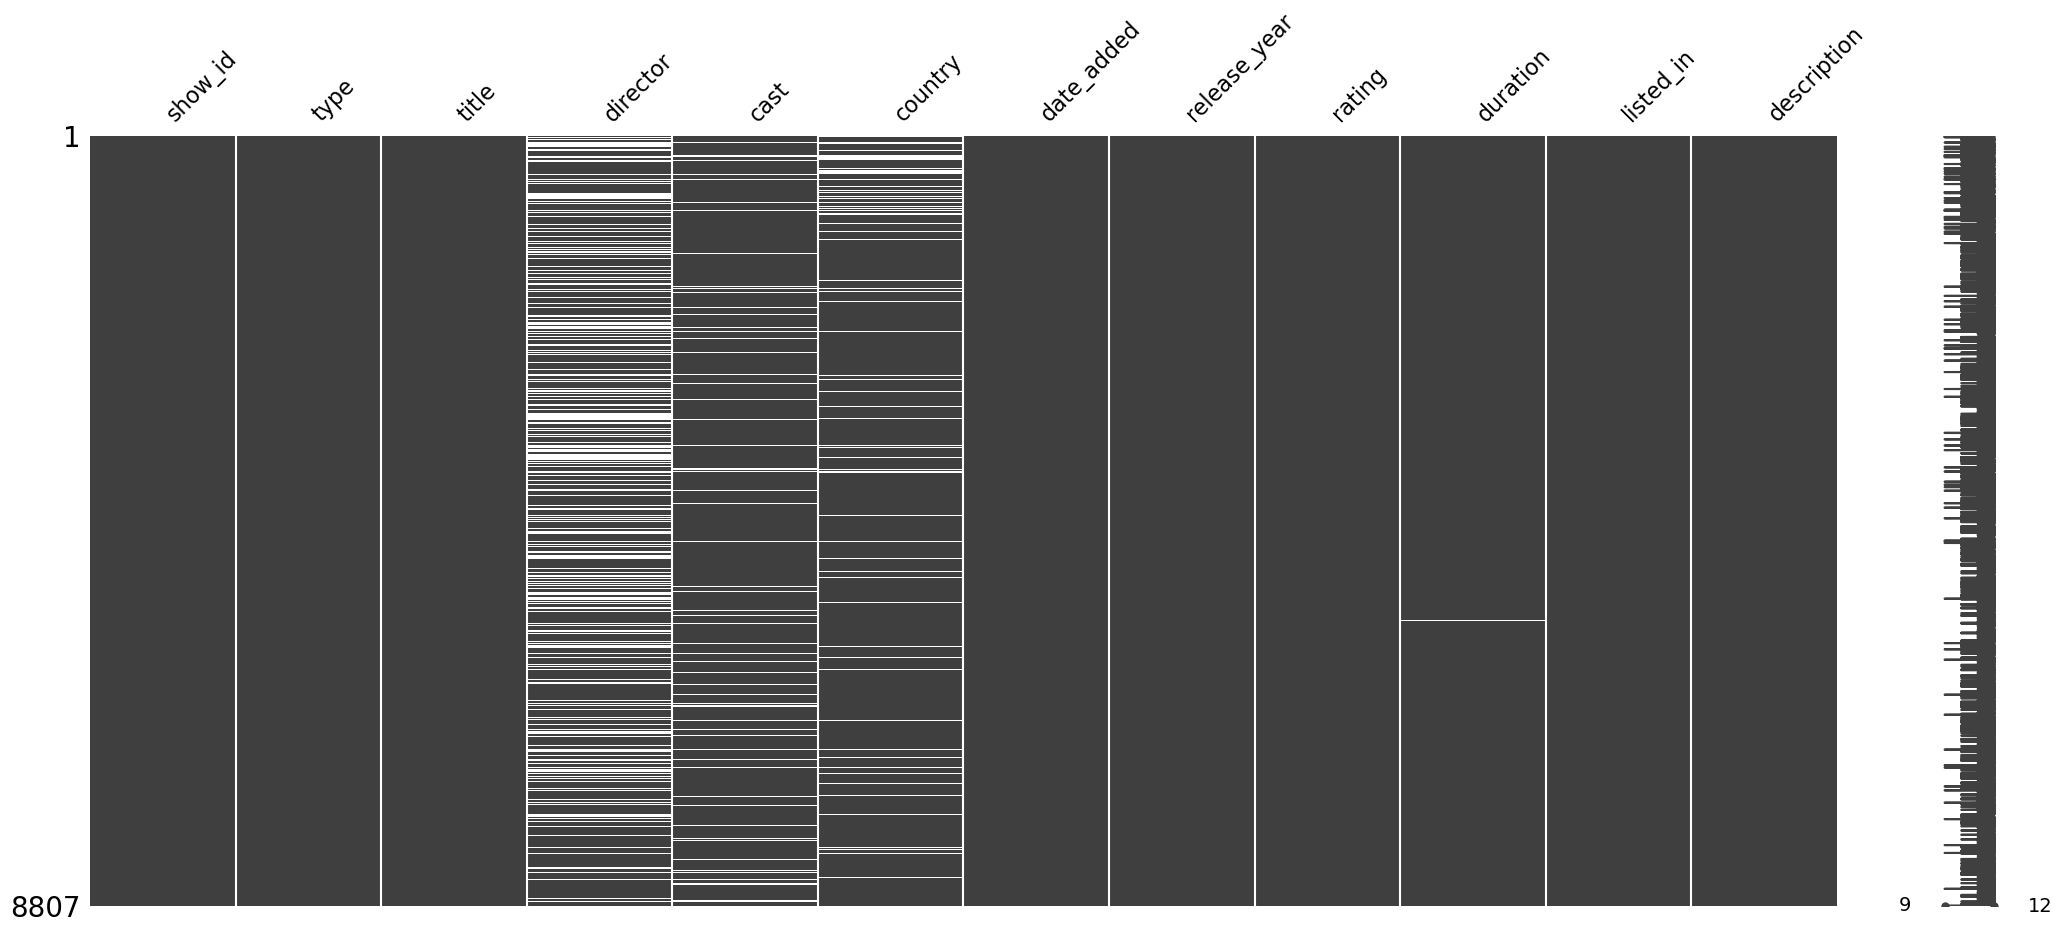

In [34]:
import missingno as msno
msno.matrix(df)

In [36]:
df.sample(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
948,s949,Movie,Swiped,Ann Deborah Fishman,"Kendall Ryan Sanders, Noah Centineo, Nathan Ga...",United States,"May 1, 2021",2018,TV-14,94 min,Comedies,When two college roommates develop a discreet ...


In [38]:
df[df['title'] == "Catch Me If You Can"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
329,s330,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada","August 1, 2021",2002,PG-13,142 min,Dramas,An FBI agent makes it his mission to put cunni...


In [44]:
df[df['type'] == "Movie"].sort_values("release_year", ascending=False).head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
570,s571,Movie,Dynasty Warriors,Chow Hin Yeung Roy,"Wang Kai, Louis Koo, Han Geng, Tony Yang, Cari...",NaN,"July 1, 2021",2021,TV-14,118 min,"Action & Adventure, International Movies","Warlords, warriors and statesmen wage a battle..."


In [52]:
df[df['type'] == "TV Show"].sort_values("release_year", ascending=False).head(1)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [62]:
df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [64]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [70]:
df['duration_int'] = df['duration'].str.extract(r'(\d+)').astype(float)

In [72]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'duration_int', 'year_added', 'month_added'],
      dtype='object')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  duration_int  8804 non-null   float64       
 13  year_added    8797 non-null   float64       
 14  month_added   8797 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int6

In [76]:
df['listed_in'] = df['listed_in'].str.split(', ')

In [78]:
print(df['type'].unique())
print(df['country'].unique())
print(df['release_year'].unique())
print(df['rating'].unique())
print(df['listed_in'].explode().unique())

['Movie' 'TV Show']
['United States' 'South Africa' nan 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan'
 'Spain, United States' 'France' 'Belgium' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States' 'South Korea'
 'Spain' 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Venezuela'
 'United States, United Kingdom, Canada' 'China, Hong Kong' 'Russia'
 'Canada' 'Hong Kong' 'United States, China, Hong Kong'
 'Italy, United State

In [80]:
df['director'].value_counts().head()

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Name: count, dtype: int64

In [82]:
df['year_added'] = df['date_added'].dt.year
df[df['type'] == 'Movie']['year_added'].value_counts().idxmax()
df[df['type'] == 'TV Show']['year_added'].value_counts().idxmax()

2020.0

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['duration_int'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract(r'([a-zA-Z]+)').fillna('Unknown')


C:\Users\Dehlia\AppData\Local\Temp\ipykernel_14044\2815022172.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


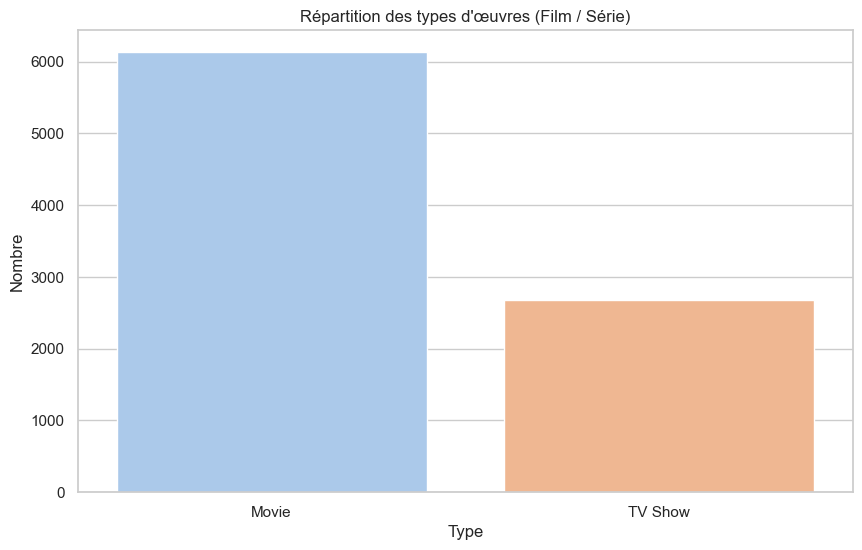

In [88]:
sns.countplot(data=df, x='type', palette='pastel')
plt.title("Répartition des types d'œuvres (Film / Série)")
plt.xlabel("Type")
plt.ylabel("Nombre")
plt.show()


C:\Users\Dehlia\AppData\Local\Temp\ipykernel_14044\2533392001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='muted')


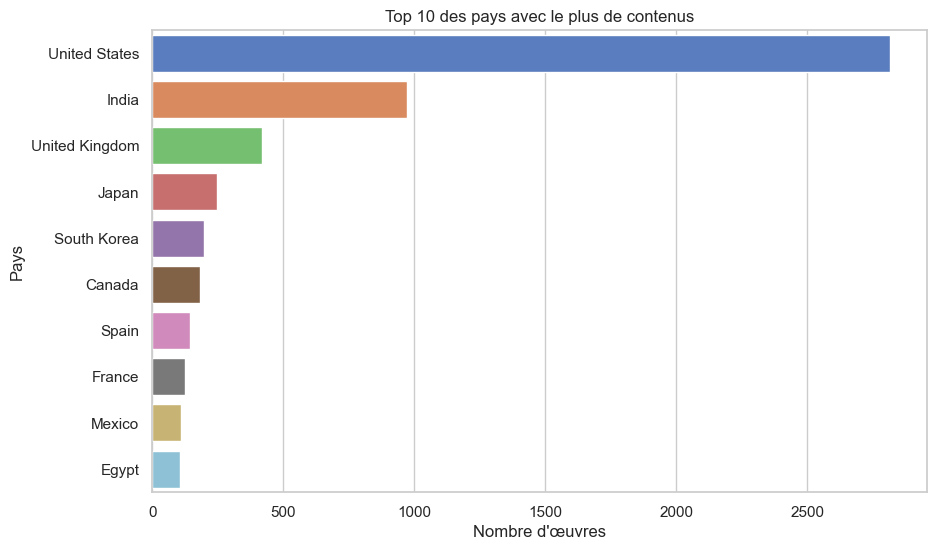

In [90]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='muted')
plt.title("Top 10 des pays avec le plus de contenus")
plt.xlabel("Nombre d'œuvres")
plt.ylabel("Pays")
plt.show()


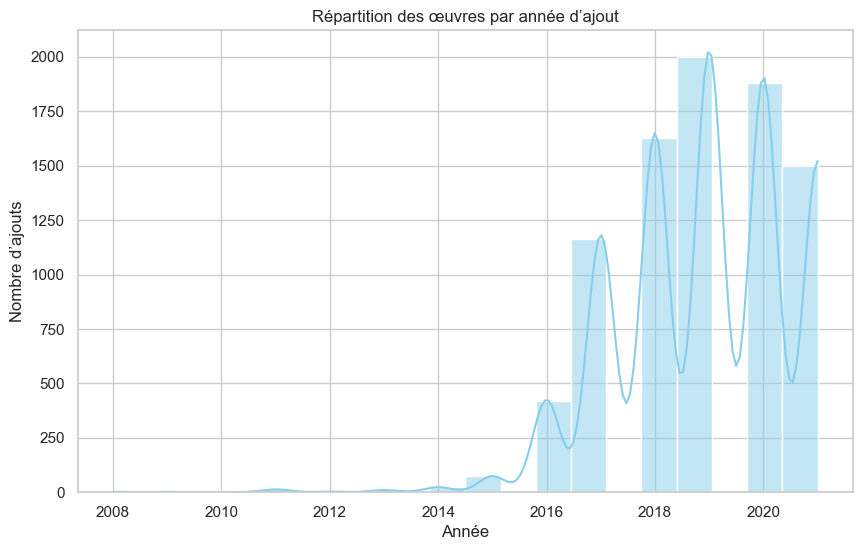

In [92]:
sns.histplot(df['year_added'].dropna(), bins=20, kde=True, color='skyblue')
plt.title("Répartition des œuvres par année d’ajout")
plt.xlabel("Année")
plt.ylabel("Nombre d’ajouts")
plt.show()


C:\Users\Dehlia\AppData\Local\Temp\ipykernel_14044\2943977285.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm')


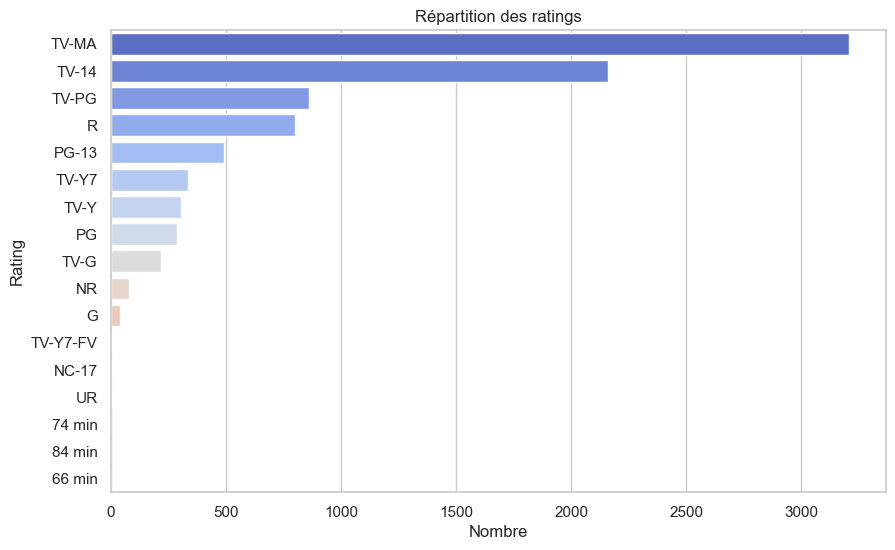

In [94]:
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm')
plt.title("Répartition des ratings")
plt.xlabel("Nombre")
plt.ylabel("Rating")
plt.show()


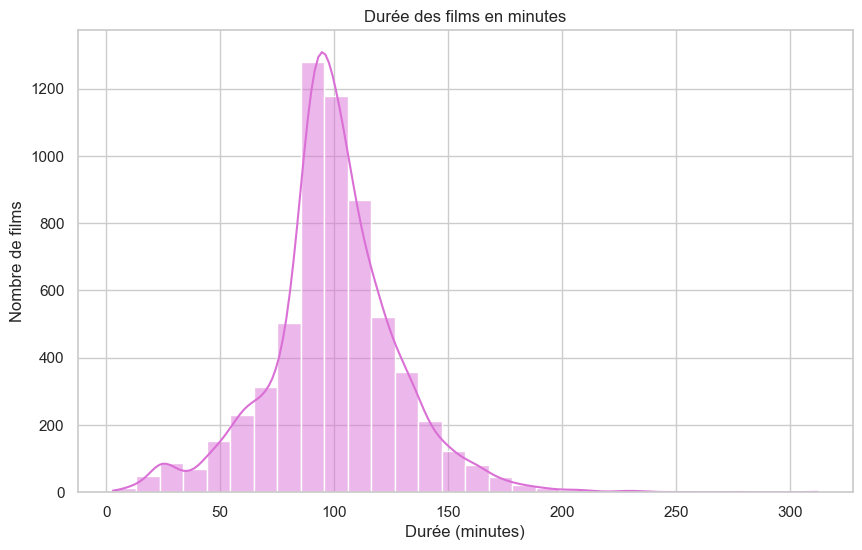

In [96]:
movies_df = df[df['type'] == 'Movie']
sns.histplot(movies_df['duration_int'].dropna(), bins=30, kde=True, color='orchid')
plt.title("Durée des films en minutes")
plt.xlabel("Durée (minutes)")
plt.ylabel("Nombre de films")
plt.show()


tv_df = df[df['type'] == 'TV Show']
sns.countplot(x=tv_df['duration_int'], palette='magma')
plt.title("Répartition des séries par nombre de saisons")
plt.xlabel("Nombre de saisons")
plt.ylabel("Nombre de séries")
plt.show()


C:\Users\Dehlia\AppData\Local\Temp\ipykernel_14044\1146072726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='Set2')


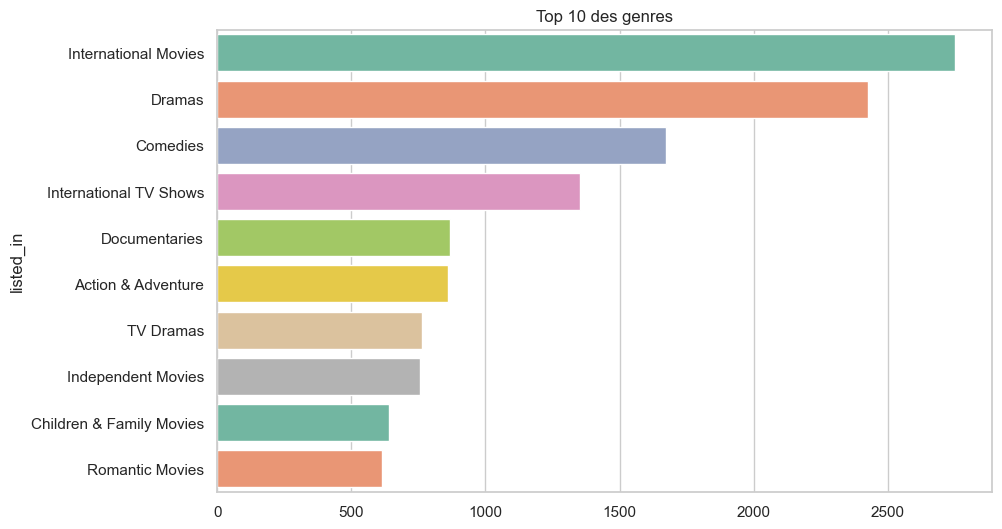

In [100]:
top_genres = df['listed_in'].str.split(', ').explode().value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='Set2')
plt.title("Top 10 des genres")
plt.show()

C:\Users\Dehlia\AppData\Local\Temp\ipykernel_14044\3078753438.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fr_directors.values, y=fr_directors.index, palette='flare')


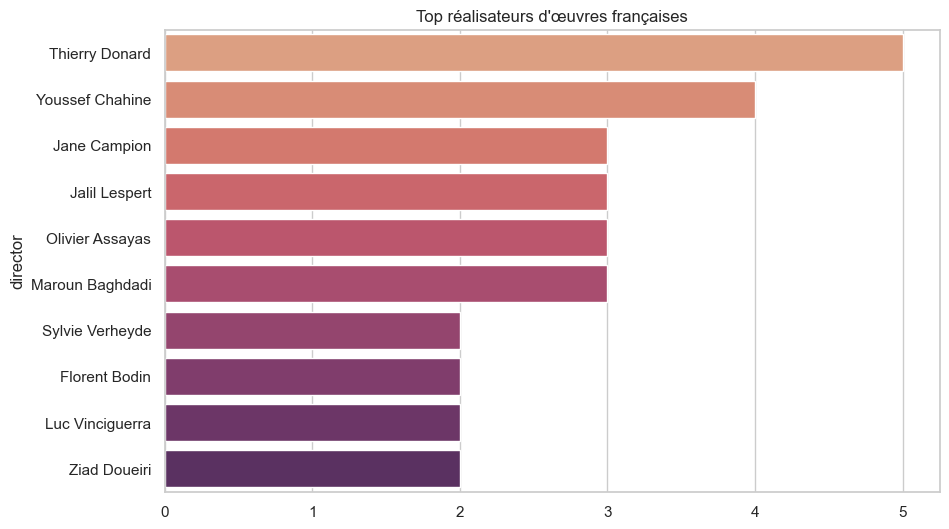

In [104]:
fr_directors = df[df['country'].str.contains('France', na=False)]['director'].dropna().value_counts().head(10)
sns.barplot(x=fr_directors.values, y=fr_directors.index, palette='flare')
plt.title("Top réalisateurs d'œuvres françaises")
plt.show()

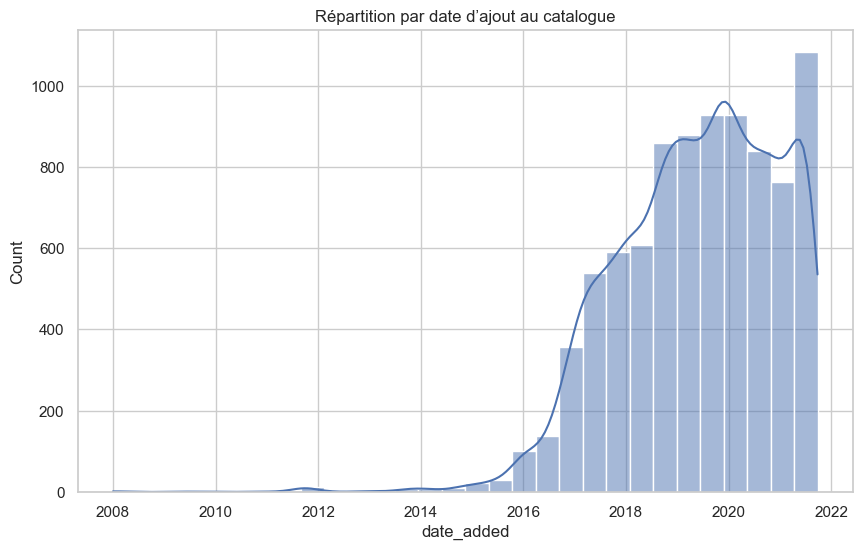

In [106]:
sns.histplot(df['date_added'].dropna(), bins=30, kde=True)
plt.title("Répartition par date d’ajout au catalogue")
plt.show()

In [120]:
top_movies = films.sort_values(by='duration_int', ascending=False).head(5)
sns.barplot(x=top_movies['duration_int'], y=top_movies['title'], palette='rocket')
plt.title("Top 5 des films les plus longs")
plt.xlabel("Minutes")
plt.show()


NameError: name 'films' is not defined

In [122]:
films = df[df['type'] == 'Movie']

C:\Users\Dehlia\AppData\Local\Temp\ipykernel_14044\70887610.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movies['duration_int'], y=top_movies['title'], palette='rocket')


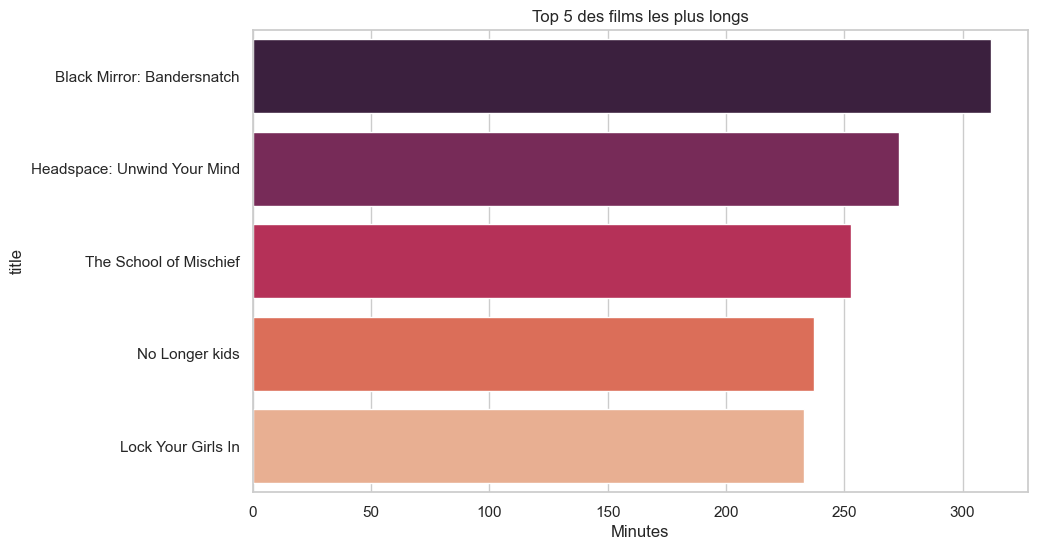

In [124]:
top_movies = films.sort_values(by='duration_int', ascending=False).head(5)
sns.barplot(x=top_movies['duration_int'], y=top_movies['title'], palette='rocket')
plt.title("Top 5 des films les plus longs")
plt.xlabel("Minutes")
plt.show()


In [126]:
series = df[df['type'] == 'TV Show']


C:\Users\Dehlia\AppData\Local\Temp\ipykernel_14044\2505904011.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_series['duration_int'], y=top_series['title'], palette='viridis')


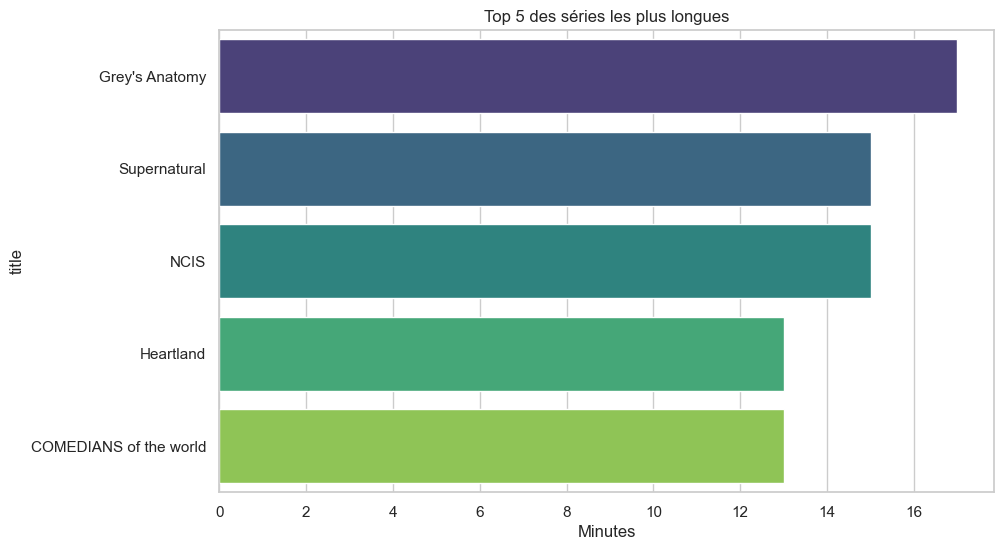

In [130]:
top_series = series.sort_values(by='duration_int', ascending=False).head(5)
sns.barplot(x=top_series['duration_int'], y=top_series['title'], palette='viridis')
plt.title("Top 5 des séries les plus longues")
plt.xlabel("Minutes")
plt.show()


 : Si les films sont plus nombreux que les séries, cela peut refléter une tendance générale de l'industrie ou une forte production de films par rapport aux séries.

2. Répartition des œuvres en fonction des pays :
Observation : Certains pays peuvent être plus représentés que d'autres. Par exemple, les États-Unis ou l'Inde sont souvent des producteurs majeurs de contenu sur Netflix.

Analyse : Si un pays est sur-représenté, cela peut suggérer une concentration des productions dans ce pays ou une préférence de Netflix pour des productions venant de certaines régions.
